In [2]:
import numpy as np
import sympy as sp
from IPython.display import display
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 240

mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "serrif"

import matplotlib.pyplot as plt
sp.init_printing()
import pyPLUTO as pp
import bachelorproject as bp
from matplotlib import colors, cm

units = bp.units()

In [3]:
gamma = 5/3
beta = 1
rho0 = 1
p0 = 1

va = np.sqrt(p0/(beta*rho0))
cs = np.sqrt(gamma*p0/rho0)
va = 1
cs = 1
theta = np.linspace(0, 8*np.pi/2, 400)+0.01

vphF = np.sqrt(.5*(va**2 + cs**2 + np.sqrt((va**2 + cs**2)**2 - 4*va**2*cs**2*np.cos(theta)**2)))
vphS = np.sqrt(.5*(va**2 + cs**2 - np.sqrt((va**2 + cs**2)**2 - 4*va**2*cs**2*np.cos(theta)**2)))
vphA = va*np.abs(np.cos(theta))

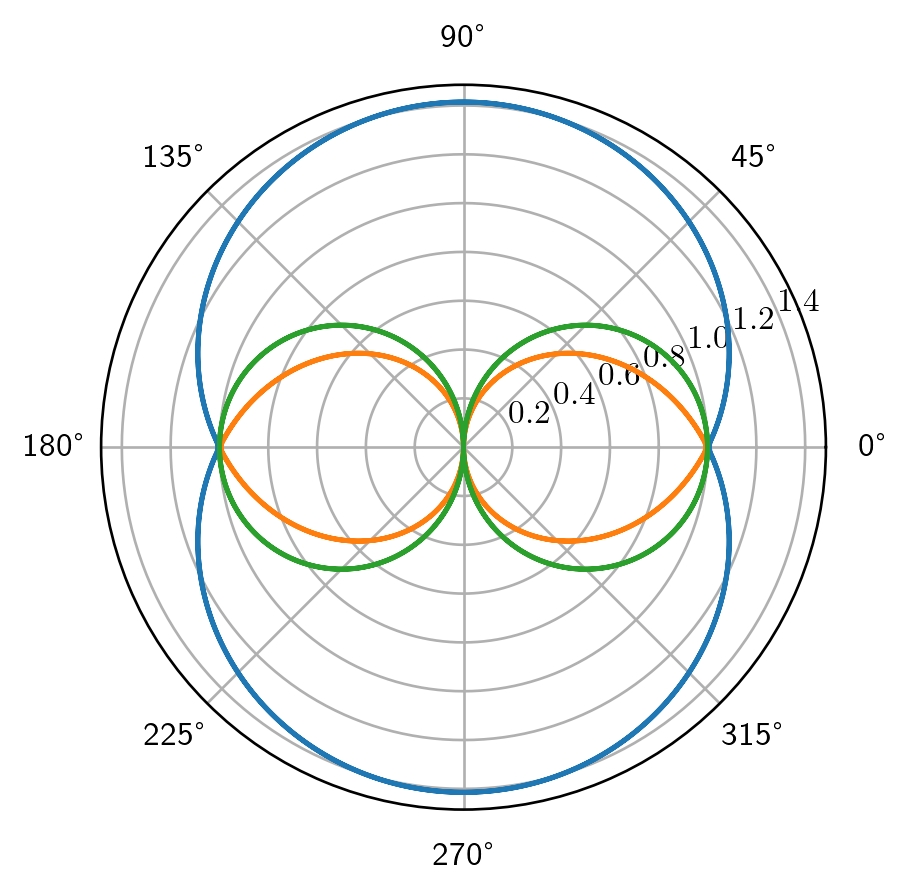

In [15]:
plt.polar(theta, vphF)
plt.polar(theta, vphS)
plt.polar(theta, vphA)

In [27]:
k_x = np.cos(theta)
k_y = np.sin(theta)
theta_x = -np.sin(theta)*2
theta_y = np.cos(theta)*2
vF_k = vphF
vF_theta = (1/(2*vphF))*(va**2 * cs**2 * np.sin(theta)*np.cos(theta))/(np.sqrt((va**2 + cs**2)**2 - 4*va**2 * cs**2 * (np.cos(theta))**2))

vS_k = vphS
vS_theta = -(1/(2*vphS))*(va**2 * cs**2 * np.sin(theta)*np.cos(theta))/(np.sqrt((va**2 + cs**2)**2 - 4*va**2 * cs**2 * (np.cos(theta))**2))

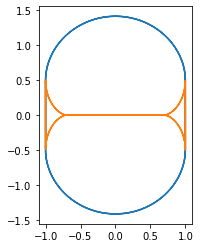

In [28]:
x_F = vF_k*k_x + vF_theta*theta_x
y_F = vF_k*k_y + vF_theta*theta_y
x_S = vS_k*k_x + vS_theta*theta_x
y_S = vS_k*k_y + vS_theta*theta_y
plt.plot(x_F, y_F)
plt.plot(x_S, y_S)

plt.axis('scaled')

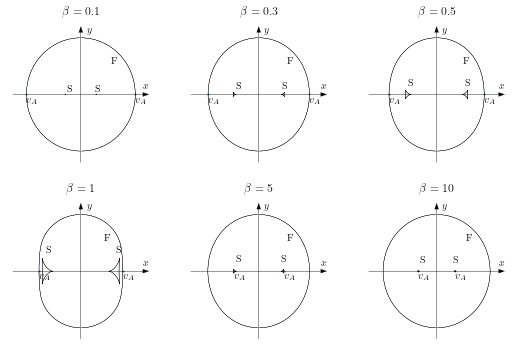

In [5]:
gamma = 5/3
rho0 = 1
p0 = 1
# betas = ["0.1", "0.3", "0.5", "1", "5", "10"]
betas = [.1, .3, .5, 1, 5, 10]
fig, ax, = plt.subplots(2,3, figsize = (7,5))

for i in range(6):
    axis = ax[i//3][i%3]
    beta = betas[i]

    va = np.sqrt(2*p0/(beta*rho0))
    cs = np.sqrt(gamma*p0/rho0)
    theta = np.linspace(0, 8*np.pi/2, 400)+0.01

    vphF = np.sqrt(.5*(va**2 + cs**2 + np.sqrt((va**2 + cs**2)**2 - 4*va**2*cs**2*np.cos(theta)**2)))
    vphS = np.sqrt(.5*(va**2 + cs**2 - np.sqrt((va**2 + cs**2)**2 - 4*va**2*cs**2*np.cos(theta)**2)))
    vphA = va*np.abs(np.cos(theta))

    k_x = np.cos(theta)
    k_y = np.sin(theta)
    theta_x = -np.sin(theta)
    theta_y = np.cos(theta)
    vF_k = vphF
    vF_theta = (1/(vphF))*(va**2 * cs**2 * np.sin(theta)*np.cos(theta))/(np.sqrt((va**2 + cs**2)**2 - 4*va**2 * cs**2 * (np.cos(theta))**2))

    vS_k = vphS
    vS_theta = -(1/(vphS))*(va**2 * cs**2 * np.sin(theta)*np.cos(theta))/(np.sqrt((va**2 + cs**2)**2 - 4*va**2 * cs**2 * (np.cos(theta))**2))
    x_F = vF_k*k_x + vF_theta*theta_x
    y_F = vF_k*k_y + vF_theta*theta_y
    x_S = vS_k*k_x + vS_theta*theta_x
    y_S = vS_k*k_y + vS_theta*theta_y

    max_x_S = np.max(x_S)
    max_y_S = np.max(y_S)
    max_x_F = np.max(x_F)
    max_y_F = np.max(y_F)

    # remove discontinuities
    pos_S = np.where((np.abs(np.diff(x_S)) + (np.abs(np.diff(y_S))))> 0.5)[0] + 1
    x_S = np.insert(x_S, pos_S, np.nan)
    y_S = np.insert(y_S, pos_S, np.nan)
    pos_F = np.where((np.abs(np.diff(x_F)) + (np.abs(np.diff(y_F))))> 0.5)[0] + 1
    x_F = np.insert(x_F, pos_S, np.nan)
    y_F = np.insert(y_F, pos_S, np.nan)

    axis.arrow(-1.2*max_y_F,0,  2*1.2*max_y_F,0, fc='k', ec='k', linewidth = 0.2, width = 0, head_width = .07*max_y_F, length_includes_head = True)
    axis.arrow(0,-1.2*max_y_F,0, 2*1.2*max_y_F, fc='k', ec='k',linewidth = 0.2, width = 0, head_width =.07*max_y_F, length_includes_head = True)
    axis.text(0.1*max_y_F, 1.1*max_y_F, "$y$")
    axis.text(1.1*max_y_F, 0.1*max_y_F, "$x$")


    axis.scatter([va, -va], [0,0], s= 1)
    axis.plot(x_F, y_F, "k", linewidth = .3)
    axis.plot(x_S, y_S, "k", linewidth = .3)

    axis.text(va, -.15*max_y_F, "$v_A$")
    axis.text(-va, -.15*max_y_F, "$v_A$")
    
    axis.text(max_x_S*0.9, max_y_S + 0.2 ,"S")
    axis.text(-max_x_S*0.9, max_y_S + 0.2 ,"S")

    axis.text(1.1*max_x_F/2, 1.1*max_y_F/2 ,"F")
    
    axis.set_axis_off()
    # axis.spines['left'].set_color('none')
    # axis.spines['right'].set_color('none')
    # axis.spines['bottom'].set_color('none')
    # axis.spines['top'].set_color('none')
    # axis.get_xaxis().set_visible(False)
    # axis.get_yaxis().set_visible(False)


    axis.set_title('$\\beta = ' + "{}".format(beta) + '$')
    axis.set_xlim(-1.3*max_y_F, 1.3*max_y_F)
    axis.set_ylim(-1.3*max_y_F, 1.3*max_y_F)
    axis.set_aspect("equal")
    fig.subplots_adjust(left=0, right=1, top = 0.9, bottom = 0)
# fig.tight_layout()
fig.savefig("../report/figures/groupspeed_beta.pdf")

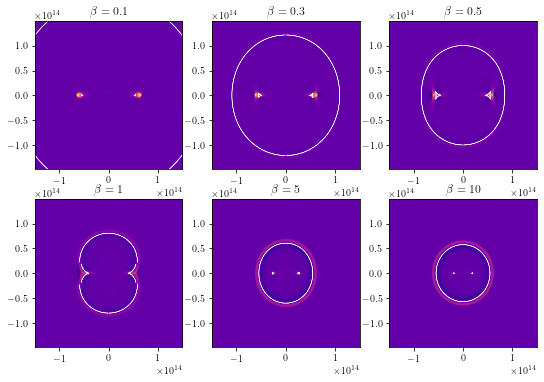

In [3]:
j = 100
gamma = 5/3
rho0 = 1
p0 = 8
betas_text = ["0.1", "0.3", "0.5", "1", "5", "10"]
betas = [.1, .3, .5, 1, 5, 10]
fig, ax, = plt.subplots(2,3, figsize = (9,6))

images = [pp.pload(j, "../pluto-definitions/blastwave_MHD/beta{}-low/".format(beta)) for beta in betas_text]
im = [0]*6
scale = [images[i].SimTime*units.UNIT_VELOCITY*units.UNIT_TIME for i in range(6)]
vmin = min(image.prs.min() for image in images)
vmax = max(image.prs.max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)

for i in range(6):
    axis = ax[i//3][i%3]
    beta = betas[i]
    frame = images[i]
    im[i] = bp.plot(axis, frame.prs, frame, norm=norm)

    va = np.sqrt(2*p0/(beta*rho0))
    cs = np.sqrt(gamma*p0/rho0)
    theta = np.linspace(0, 8*np.pi/2, 400)+0.01

    vphF = np.sqrt(.5*(va**2 + cs**2 + np.sqrt((va**2 + cs**2)**2 - 4*va**2*cs**2*np.cos(theta)**2)))
    vphS = np.sqrt(.5*(va**2 + cs**2 - np.sqrt((va**2 + cs**2)**2 - 4*va**2*cs**2*np.cos(theta)**2)))
    vphA = va*np.abs(np.cos(theta))

    k_x = np.cos(theta)
    k_y = np.sin(theta)
    theta_x = -np.sin(theta)
    theta_y = np.cos(theta)
    vF_k = vphF
    vF_theta = (1/(vphF))*(va**2 * cs**2 * np.sin(theta)*np.cos(theta))/(np.sqrt((va**2 + cs**2)**2 - 4*va**2 * cs**2 * (np.cos(theta))**2))

    

    vS_k = vphS
    vS_theta = -(1/(vphS))*(va**2 * cs**2 * np.sin(theta)*np.cos(theta))/(np.sqrt((va**2 + cs**2)**2 - 4*va**2 * cs**2 * (np.cos(theta))**2))
    x_F = vF_k*k_x + vF_theta*theta_x
    y_F = vF_k*k_y + vF_theta*theta_y
    x_S = vS_k*k_x + vS_theta*theta_x
    y_S = vS_k*k_y + vS_theta*theta_y

    # remove discontinuities
    pos_S = np.where((np.abs(np.diff(x_S)) + (np.abs(np.diff(y_S))))> 0.2)[0] + 1
    x_S = np.insert(x_S, pos_S, np.nan)
    y_S = np.insert(y_S, pos_S, np.nan)
    pos_F = np.where((np.abs(np.diff(x_F)) + (np.abs(np.diff(y_F))))> 0.2)[0] + 1
    x_F = np.insert(x_F, pos_S, np.nan)
    y_F = np.insert(y_F, pos_S, np.nan)
    axis.autoscale(False)
    axis.plot(scale[i]*x_F, scale[i]*y_F, 'w', linewidth = .5, scalex= False, scaley = False)
    axis.plot(scale[i]*x_S, scale[i]*y_S, 'w', linewidth = 0.5)
    axis.set_title('$\\beta = ' + "{}".format(beta) + '$')

# fig.savefig("../report/figures/comparison_groupspeed.pdf")




In [54]:
images[1].SimTime

In [3]:
images[1].SimTime*units.UNIT_VELOCITY*units.UNIT_TIME

In [60]:
units.UNIT_VELOCITY
units.UNIT_TIME

In [12]:
np.max(x_S)